# Projeto de análise exploratória  

Usando dataset do kaggle para prever desempenho de jogadores baseado em seus comportamentos.

In [1]:
# importando bibliotecas necessárias
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


Sempre verificar versões caso dê algum erro

In [2]:
# ! pip install matplotlib==3.7.3 seaborn==0.13.0

In [3]:
sns.__version__

'0.13.0'

In [4]:
# carregando o dataset
gamers_df = pd.read_csv("online_gaming_behavior_dataset.csv")
gamers_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


## Infos sobre o dataset  

Target -> EngajamentLevel = 'High', 'Medium', 'Low'

In [5]:
# verificando dimensao do dataset 
gamers_df.shape

(40034, 13)

In [6]:
# verificando resumo do dataset

gamers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [7]:
# observando infos estatísticas
gamers_df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [8]:
# verificando se tem dados ausentes 
gamers_df.isna().sum() #isnull() tbm funciona

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

In [9]:
# visualizando tipos de dados 
gamers_df.dtypes

PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

Object = string

### Distribuição de cada coluna numérica

array([[<Axes: title={'center': 'PlayerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'PlayTimeHours'}>],
       [<Axes: title={'center': 'InGamePurchases'}>,
        <Axes: title={'center': 'SessionsPerWeek'}>,
        <Axes: title={'center': 'AvgSessionDurationMinutes'}>],
       [<Axes: title={'center': 'PlayerLevel'}>,
        <Axes: title={'center': 'AchievementsUnlocked'}>, <Axes: >]],
      dtype=object)

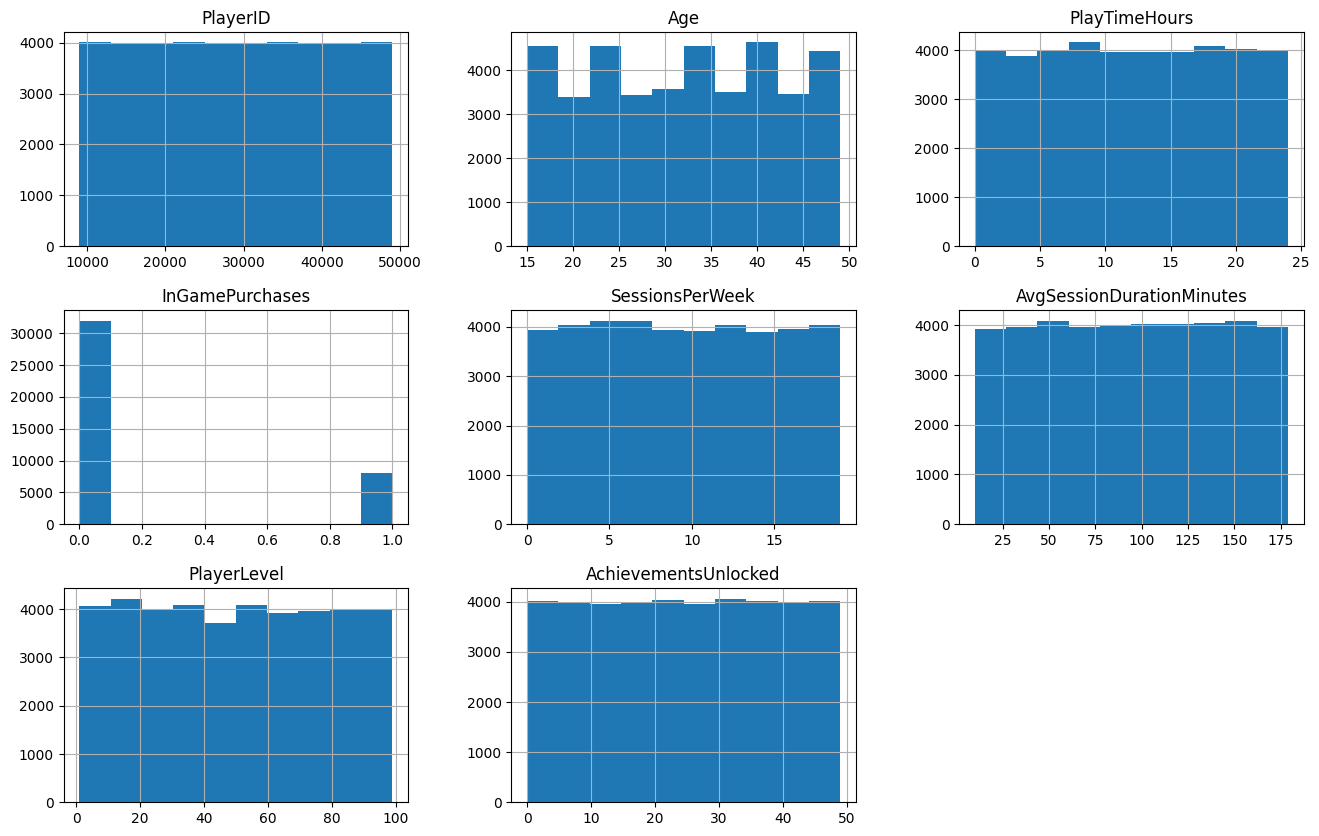

In [10]:
# plotando histograma dos atributos do dataset
gamers_df.hist(figsize=(16,10))

## Tratando dados não numéricos

In [11]:
# convertendo genero para valores binários
gamers_df[["Gender", "EngagementLevel"]]

,Gender,EngagementLevel
0,Male,Medium
1,Female,Medium
2,Female,High
3,Male,Medium
4,Male,Medium
...,...,...
40029,Male,Medium
40030,Female,High
40031,Female,High
40032,Male,Medium


In [12]:
# transformando genero para 0 e 1; 0 = male, 1 = female 

d = {'Male': 0, "Female": 1}
gamers_df["Gender"] = gamers_df["Gender"].map(d)
gamers_df.head()


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,0,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,1,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,1,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,0,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,0,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


Verificando se os dados de Gender alteraram de object para int

In [13]:
gamers_df.dtypes

PlayerID                       int64
Age                            int64
Gender                         int64
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

## Visualização dos dados 

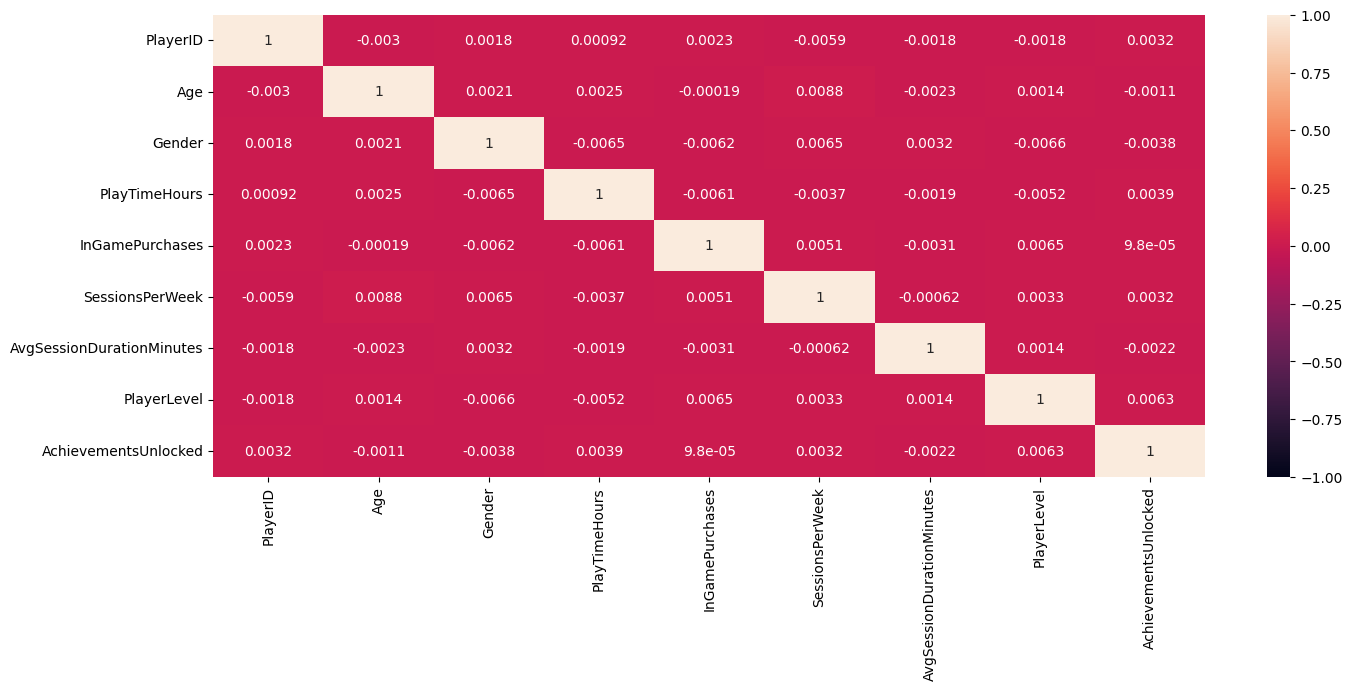

In [14]:
# heatmap 

plt.figure(figsize=(16,6))
# sns.heatmap(gamers_df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

sns.heatmap(gamers_df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
plt.show()

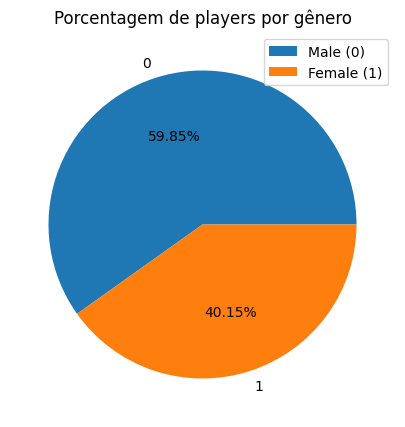

In [15]:
#male vs female players

players = gamers_df["Gender"].value_counts()
players
# print(players.index)
labels = ['Male (0)', "Female (1)"]
plt.figure(figsize=(8,5))

plt.pie(players, labels=players.index, autopct = '%.2f%%')
plt.legend(labels, loc="best")

plt.title("Porcentagem de players por gênero")
plt.show()



Comunidade de jogadores predominantemente masculina

In [16]:
print("Idade máxima: ", gamers_df["Age"].max())
print("Idade mínima: ", gamers_df["Age"].min())

Idade máxima:  49
Idade mínima:  15


(array([1101., 1138., 1149., 1167., 1139., 1113., 1128., 1150., 1130.,
        1153., 1108., 1107., 1217., 1108., 1187., 1150., 1228., 1163.,
        1123., 1103., 1151., 1154., 1219., 1140., 1128., 1202., 1111.,
        1187., 1180., 1166., 1108., 1121., 2199.]),
 array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48.]),
 <BarContainer object of 33 artists>)

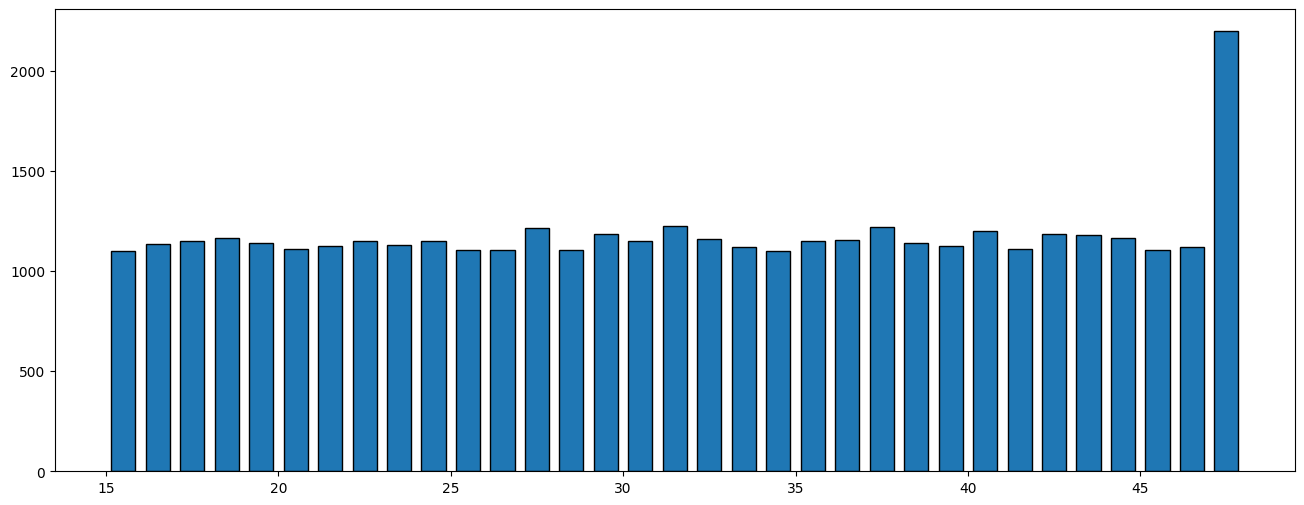

In [17]:
# distribuição de idades

plt.figure(figsize=(16,6))

plt.hist(gamers_df["Age"], bins=range(15,49), edgecolor='black', rwidth=0.7)



23.999591633580454
0.0001146866199155
12.00800215801307


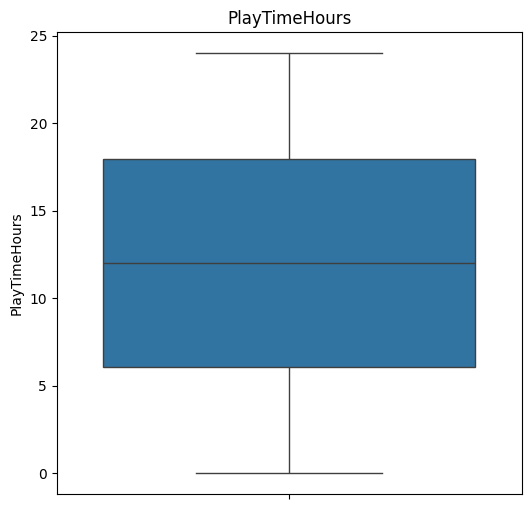

In [18]:
# conferencia dos valores max, min e mediana para poder analisar o boxplot melhor
print(gamers_df['PlayTimeHours'].max())
print(gamers_df['PlayTimeHours'].min())
print(gamers_df['PlayTimeHours'].median())
plt.figure(figsize=(6, 6))


sns.boxplot(gamers_df['PlayTimeHours'])
plt.title('PlayTimeHours')

plt.show()


Como observado no boxplot, não há outliers e o valor mínimo é perto de 0.0 e o valor máximo é aproximadamente 24, com a mediana batendo em 12

In [19]:
# generos dos jogos
genres_counts = gamers_df["GameGenre"].value_counts()
genres_counts


GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64

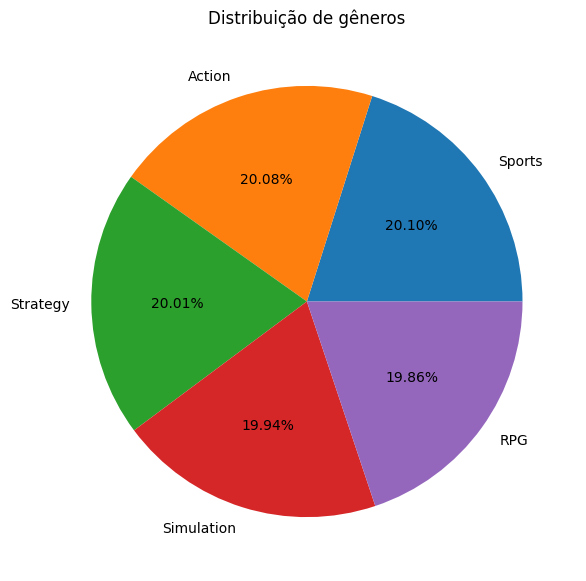

In [20]:
# distribuição dos gêneros 

plt.figure(figsize=(16,7))
plt.title("Distribuição de gêneros")
plt.pie(genres_counts, labels=genres_counts.index, autopct= "%.2f%%"  )

plt.show()

Gêneros bem distribuidos

Gender         0     1
GameGenre             
Action      4890  3149
RPG         4717  3235
Simulation  4765  3218
Sports      4805  3243
Strategy    4782  3230


Text(0.5, 1.0, 'Popularidade de gênero de jogo por gênero')

<Figure size 2500x2000 with 0 Axes>

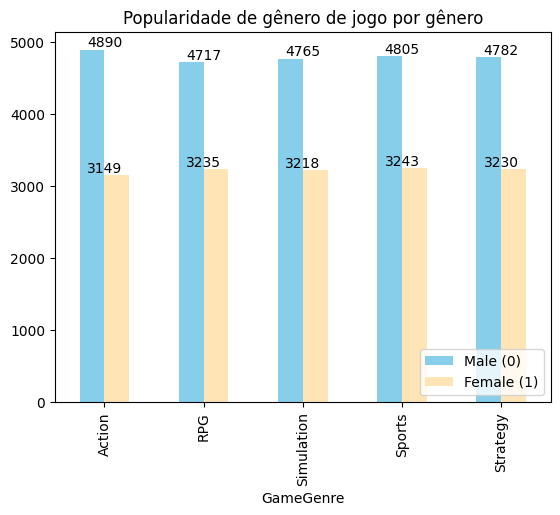

In [21]:
# popularidade de gênero entre público masculino e feminino

genres_gender = gamers_df.groupby(["GameGenre", "Gender"]).size().unstack()

print(genres_gender)

plt.figure(figsize=(25,20))

genres_gender.plot(kind="bar", color=['skyblue', 'moccasin'])

# enumerando as quantidades no grafico
for i, (genre,row) in enumerate(genres_gender.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, value, f'{value}', ha='center', va='bottom')

plt.legend(labels=["Male (0) ","Female (1)"], loc="lower right")

plt.title("Popularidade de gênero de jogo por gênero")



Gênero predominante na parcela masculina: Action  
Gênero predominante na parcela feminina: Sports

[16000 12004  8095  3935]


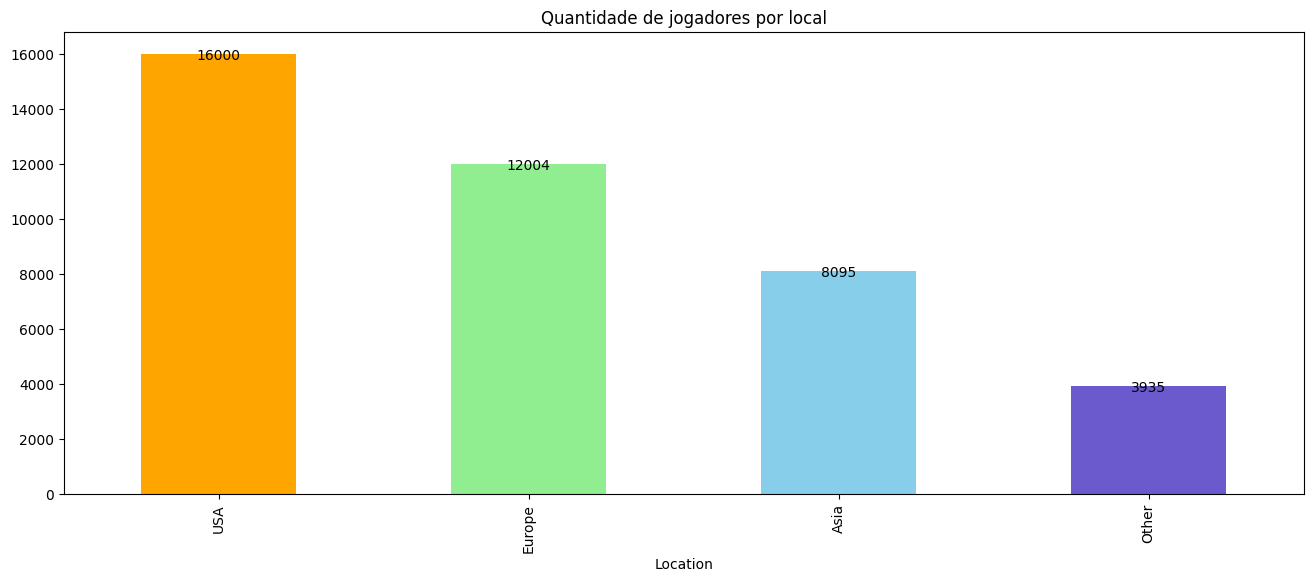

In [22]:
# jogadores por localidade 
player_by_loc = gamers_df["Location"].value_counts()
print(player_by_loc.values)

fig = plt.figure(figsize=(16,6))

player_by_loc.plot(kind="bar", color=['orange', 'lightgreen', 'skyblue', 'slateblue'])
for i, v in enumerate(player_by_loc.values):
    plt.gca().text(i, v, str(v), ha='center', va='center_baseline')
plt.title("Quantidade de jogadores por local")
plt.show()


Location    Asia  Europe  Other   USA
GameGenre                            
Action      1656    2428    792  3163
RPG         1620    2372    787  3173
Simulation  1623    2414    795  3151
Sports      1582    2431    775  3260
Strategy    1614    2359    786  3253


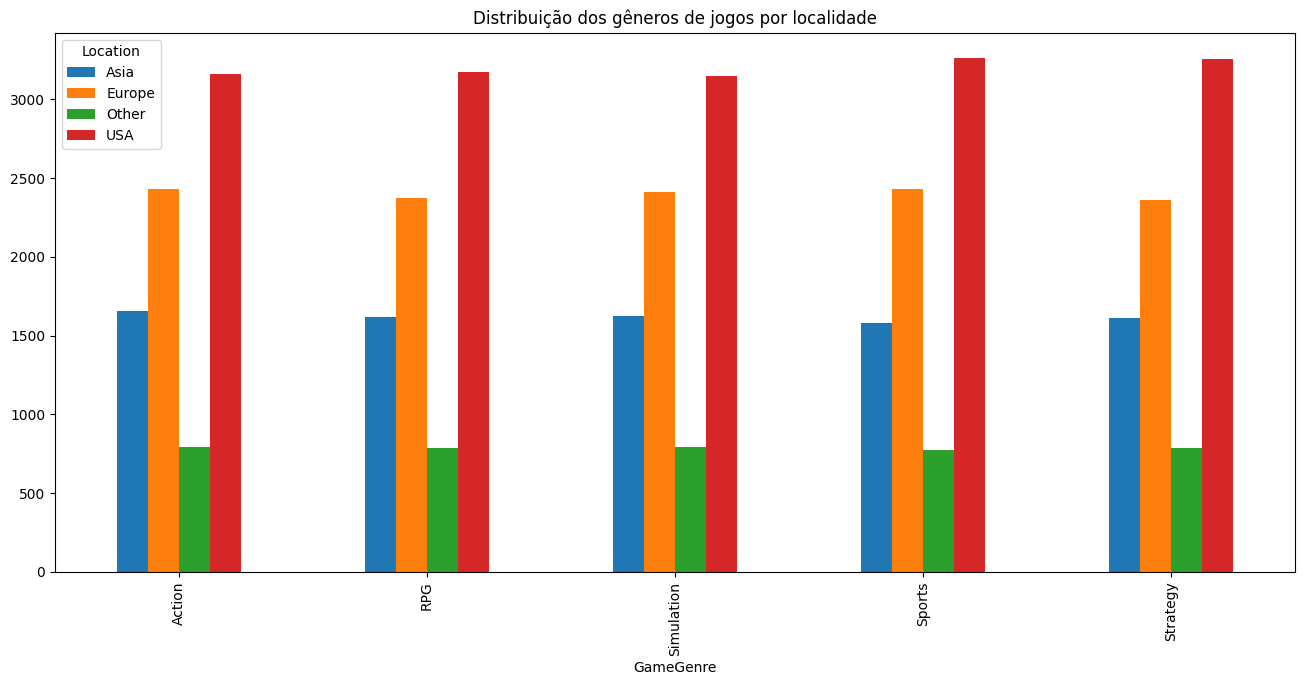

In [25]:
# agrupando por genero e localização
genre_country = gamers_df.groupby(['GameGenre', 'Location']).size().unstack() 

genre_country.plot(kind="bar", figsize=(16,7))

plt.title("Distribuição dos gêneros de jogos por localidade")

print(genre_country)

A distribuição por gênero de jogo é bem parecida entre as localidades

In [ ]:
gamers_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,0,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,1,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,1,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,0,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,0,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


Text(0.5, 1.0, 'Distribuição de gêneros entre dificuldade de jogo ')

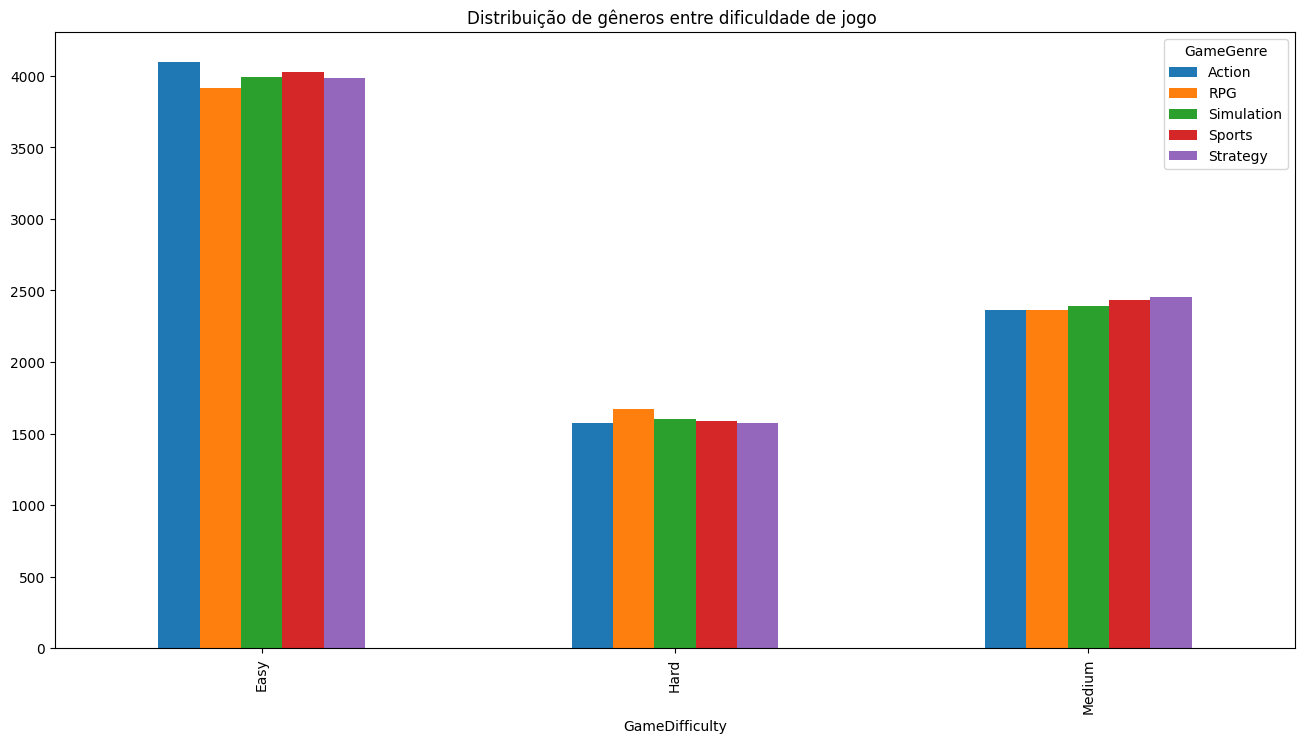

In [27]:

difficulty_genre = gamers_df.groupby(["GameDifficulty", "GameGenre"]).size().unstack()
difficulty_genre.plot(kind="bar", figsize=(16,8))
plt.title("Distribuição de gêneros entre dificuldade de jogo ")

Há mais jogos fáceis entre os diferentes gêneros.

### Influência das variáveis no desempenho de cada jogador

In [ ]:
gamers_df.dtypes

PlayerID                       int64
Age                            int64
Gender                         int64
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

analisando como o unstack funciona

In [ ]:
print(gamers_df.groupby(['GameGenre', 'Location']).size())

GameGenre   Location
Action      Asia        1656
            Europe      2428
            Other        792
            USA         3163
RPG         Asia        1620
            Europe      2372
            Other        787
            USA         3173
Simulation  Asia        1623
            Europe      2414
            Other        795
            USA         3151
Sports      Asia        1582
            Europe      2431
            Other        775
            USA         3260
Strategy    Asia        1614
            Europe      2359
            Other        786
            USA         3253
dtype: int64


In [ ]:
print(gamers_df.groupby(['GameGenre', 'Location']).size().unstack())

Location    Asia  Europe  Other   USA
GameGenre                            
Action      1656    2428    792  3163
RPG         1620    2372    787  3173
Simulation  1623    2414    795  3151
Sports      1582    2431    775  3260
Strategy    1614    2359    786  3253


EngagementLevel,High,Low,Medium
PlayerLevel,,,
1,96,135,177
2,91,99,209
3,106,115,166
4,95,132,187
5,93,138,194
...,...,...,...
95,123,79,203
96,101,82,198
97,117,73,234


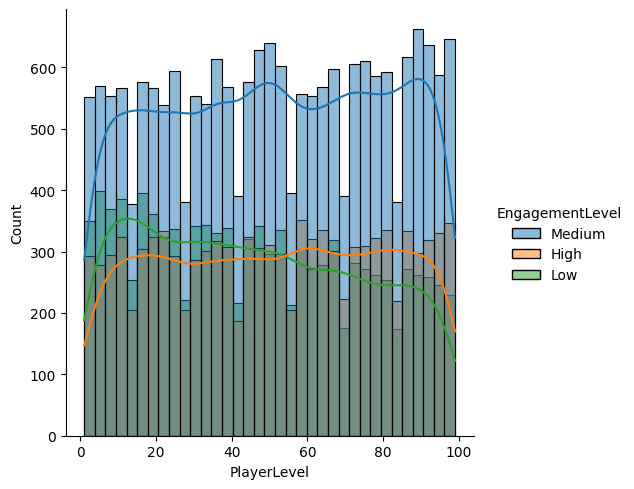

In [ ]:

sns.displot(x="PlayerLevel", hue="EngagementLevel", data=gamers_df, kde=True)
gamers_df.groupby(["PlayerLevel", "EngagementLevel"]).size().unstack()


Analisando o gráfico, é possível perceber que geralmente, jogadores com níveis mais baixos possuem menor engajamento. Conforme o nível vai aumentando, a quantidade de jogadores com engajamento baixo vai diminuindo, enquanto os jogadores com engajamento médio permanece contínuo. 

EngagementLevel,High,Low,Medium
Age,,,
15,312,290,499
16,310,282,546
17,305,297,547
18,304,311,552
19,302,293,544
20,287,293,533
21,277,292,559
22,295,279,576
23,286,302,542


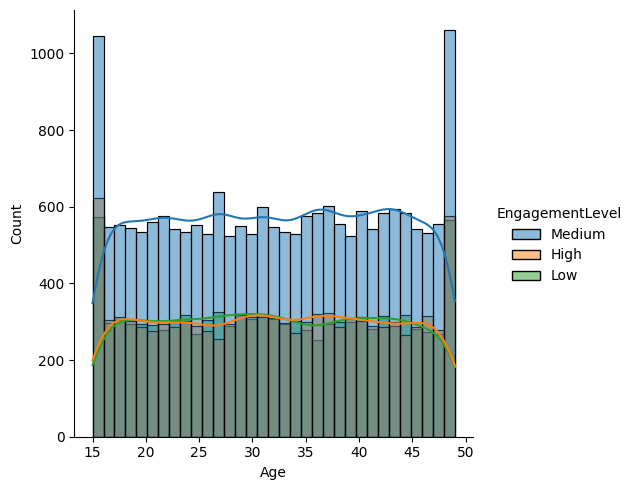

In [ ]:
sns.displot(x="Age", hue="EngagementLevel", data=gamers_df, kde=True)
gamers_df.groupby(["Age", "EngagementLevel"]).size().unstack()


Jogadores mais novos tendem a ter engajamento menor, enquanto a idade vai aumentando, há alguns picos. Nível de engajamento maior é maior na faixa dos 30 anos e vai decaindo conforme a idade aumenta.  

[    0     1     2 ... 40031 40032 40033]


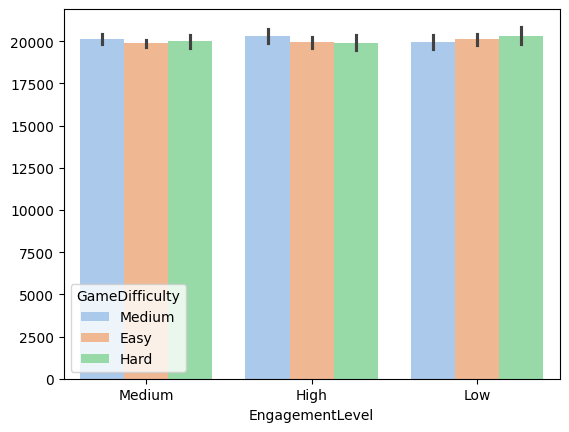

In [ ]:
sns.barplot(x='EngagementLevel', y=gamers_df["GameDifficulty"].index.values, hue='GameDifficulty' , data=gamers_df, palette='pastel')
print(gamers_df["GameDifficulty"].index.values)

Distribuição de níveis de engajamento por nível de dificuldade do jogo. Podemos observar que geralmente, curiosamente, jogadores com baixo engajamento jogam jogos mais difícies, enquanto jogadores com nível alto de engajamento jogam jogos de dificuldade média. No caso, não há uma variação tão grande assim entre as dificuldades dos jogos.

EngagementLevel,High,Low,Medium
SessionsPerWeek,,,
0,70,1842,55
1,62,1807,111
2,71,1385,562
3,64,917,1038
4,73,687,1331
5,65,548,1422
6,56,446,1491
7,63,379,1695
8,153,322,1488


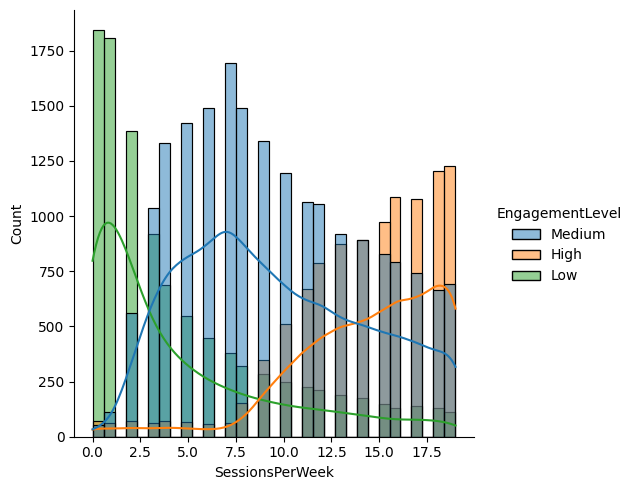

In [ ]:
sns.displot(x="SessionsPerWeek", hue='EngagementLevel', data=gamers_df, kde=True)
gamers_df.groupby(["SessionsPerWeek", "EngagementLevel"]).size().unstack()

Jogadores com baixo engajamento tendem a fazer de 1 a 2 sessões por semana, enquanto jogadores de engajamento médio geralmente fazem de 2 a 6 sessões por semana. Jogadores de engajamento alto fazem de 7 a 8 sessões por semana.  
Ou seja, baixo engajamento = poucas sessões

EngagementLevel,High,Low,Medium
AvgSessionDurationMinutes,,,
10,7,226,14
11,7,195,16
12,11,218,18
13,7,187,23
14,9,199,23
...,...,...,...
175,132,25,71
176,130,25,70
177,131,33,86


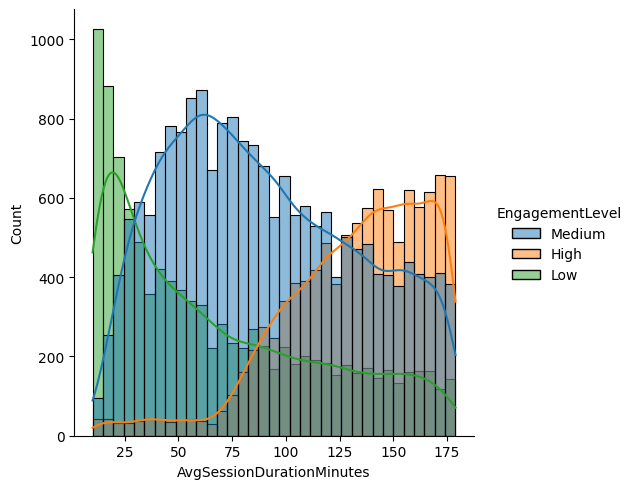

In [ ]:
sns.displot(x="AvgSessionDurationMinutes", hue="EngagementLevel", data=gamers_df, kde=True)
gamers_df.groupby(["AvgSessionDurationMinutes", "EngagementLevel"]).size().unstack()

Jogadores de baixo engajamento tendem a passar em média 25 minutos por sessão, enquanto jogadores de médio engajamento gastam cerca de 25 a 60 minutos por sessão. Já os jogadores de alto engajamento gastam de 75 pra mais por sessão.  
Ou seja, maior engajamento = mais minutos gastos por sessão.

## Tratamento de dados não numéricos para construção do modelo

In [ ]:
gamers_df.dtypes

PlayerID                       int64
Age                            int64
Gender                         int64
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

In [ ]:
gamers_df["EngagementLevel"].head(10)

0    Medium
1    Medium
2      High
3    Medium
4    Medium
5       Low
6       Low
7    Medium
8    Medium
9      High
Name: EngagementLevel, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

gamers_df["Location"] = label_encoder.fit_transform(gamers_df["Location"])
gamers_df["GameGenre"]  = label_encoder.fit_transform(gamers_df["GameGenre"])
gamers_df["GameDifficulty"] = label_encoder.fit_transform(gamers_df["GameDifficulty"])
gamers_df["EngagementLevel"] = label_encoder.fit_transform(gamers_df["EngagementLevel"])

gamers_df.head(10)


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,0,2,4,16.271119,0,2,6,108,79,25,2
1,9001,29,1,3,4,5.525961,0,2,5,144,11,10,2
2,9002,22,1,3,3,8.223755,0,0,16,142,35,41,0
3,9003,35,0,3,0,5.265351,1,0,9,85,57,47,2
4,9004,33,0,1,0,15.531945,0,2,2,131,95,37,2
5,9005,37,0,1,1,20.561855,0,0,2,81,74,22,1
6,9006,25,0,3,0,9.752716,0,1,1,50,13,2,1
7,9007,25,1,0,1,4.401729,0,2,10,48,27,23,2
8,9008,38,1,1,2,18.152733,0,0,5,101,23,41,2
9,9009,38,1,2,3,23.942772,0,0,13,95,99,36,0


## Normalização de dados numéricos  


In [ ]:
gamers_df.dtypes

PlayerID                       int64
Age                            int64
Gender                         int64
Location                       int64
GameGenre                      int64
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                 int64
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel                int64
dtype: object

Colunas numéricas  
- Age  
- PlayTimeHours  
- SessionsPerWeek  
- AvgSessionDurationMinutes  
- PlayerLevel  


In [ ]:
# usando minmaxscaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
cols_to_scale = ["Age", "PlayTimeHours", "SessionsPerWeek", "AvgSessionDurationMinutes", "PlayerLevel"]

normalize.fit(gamers_df[cols_to_scale])

gamers_df[cols_to_scale] = normalize.transform(gamers_df[cols_to_scale])

gamers_df.head()


,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,0.823529,0,2,4,0.677973,0,2,0.315789,0.579882,0.795918,25,2
1,9001,0.411765,1,3,4,0.230249,0,2,0.263158,0.792899,0.102041,10,2
2,9002,0.205882,1,3,3,0.342659,0,0,0.842105,0.781065,0.346939,41,0
3,9003,0.588235,0,3,0,0.219390,1,0,0.473684,0.443787,0.571429,47,2
4,9004,0.529412,0,1,0,0.647174,0,2,0.105263,0.715976,0.959184,37,2


## Separando em conjunto de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# removendo colunas que não vamos usar 
gamers_df.drop(["PlayerID", "InGamePurchases"], axis=1, inplace=True) 


playerid = valor único, não vai ajudar muito. compras no jogo, não influencia tanto assim no nível de engajamento do jogador

In [ ]:
# analisando dataset
gamers_df.head()

,Age,Gender,Location,GameGenre,PlayTimeHours,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,0.823529,0,2,4,0.677973,2,0.315789,0.579882,0.795918,25,2
1,0.411765,1,3,4,0.230249,2,0.263158,0.792899,0.102041,10,2
2,0.205882,1,3,3,0.342659,0,0.842105,0.781065,0.346939,41,0
3,0.588235,0,3,0,0.219390,0,0.473684,0.443787,0.571429,47,2
4,0.529412,0,1,0,0.647174,2,0.105263,0.715976,0.959184,37,2


Separando em treino e teste

In [ ]:
# dropa o target do dataset para o modelo nao saber a resposta correta -> ou seja, evitar o overfitting 
x = gamers_df.drop(["EngagementLevel"], axis=1)
y = gamers_df["EngagementLevel"].copy() # copiando para usar na base de teste depois


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=20)

In [ ]:
# verificando tamanho dos conjuntos, tem que ter as mesmas dimensoes
print("Conjunto de treino: ", x_train.shape, y_train.shape)
print("Conjunto de teste: ", x_test.shape, y_test.shape)

Conjunto de treino:  (28023, 10) (28023,)
Conjunto de teste:  (12011, 10) (12011,)


## Usando regressão logística para classificação

In [ ]:
from sklearn.linear_model import LogisticRegression
# relembrando, quanto menor o valor de C, melhor. evita o overfitting 
clf = LogisticRegression(random_state=0, solver="newton-cg", C=0.01).fit(x_train, y_train)


In [ ]:
# prevendo valores 
yhat = clf.predict(x_test)
yhat


array([0, 1, 2, ..., 0, 0, 0])

In [ ]:
# avaliando a probabilidade de pertencer a cada classe usando o predict proba 
yhat_proba = clf.predict_proba(x_test)
yhat_proba

array([[0.8479676 , 0.00385125, 0.14818114],
       [0.00224737, 0.80145756, 0.19629507],
       [0.0361047 , 0.46585062, 0.49804468],
       ...,
       [0.59815252, 0.03935313, 0.36249436],
       [0.54780565, 0.02622059, 0.42597376],
       [0.78323271, 0.00764946, 0.20911783]])

## Avaliando o modelo 

In [ ]:
# usando matriz de confusao 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      3054
           1       0.85      0.65      0.74      3082
           2       0.77      0.93      0.84      5875

    accuracy                           0.82     12011
   macro avg       0.85      0.78      0.81     12011
weighted avg       0.83      0.82      0.82     12011



In [ ]:
cm = confusion_matrix(y_test, yhat)

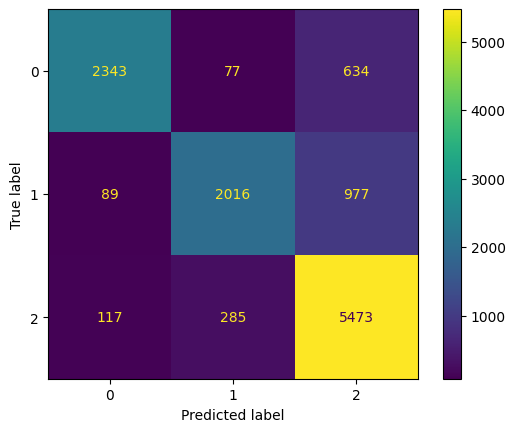

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

Com cerca de 82% de acurácia, podemos observar pela matriz de confusão que no geral o modelo se saiu bem. Basta observar a diagonal principal, onde os valoers previstos batem com os valores verdadeiros. Nesse caso, o modelo preveu muitos valores corretamente .

Foram testados os solvers 'liblinear' e 'newton-cg', onde o newton-cg apresentou maior acurácia. (81% liblinear, 82% newton-cg)